In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.append('../scripts/')
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from PIL import Image
from patchify import patchify, unpatchify


In [70]:
# filepaths **replace with folderpaths for batch later**
shp = r"../content/landscape_character_grid/selection_white_peak.shp"
tif = r"../content/tifs/5k_tifs/189226695.27.tif"
save = r"../content/tifs/1k_tifs/"


### Using Patchify

In [71]:
# read tif
lyr = cv2.imread(tif, 0)

In [72]:
print(lyr.shape)

(11712, 8870)


In [73]:
lcg = patchify(lyr, (1398, 1398), step= 1398)
print("Large image shape is: ", lyr.shape)
print("Patches array shape is: ", lcg.shape)

Large image shape is:  (11712, 8870)
Patches array shape is:  (8, 6, 1398, 1398)


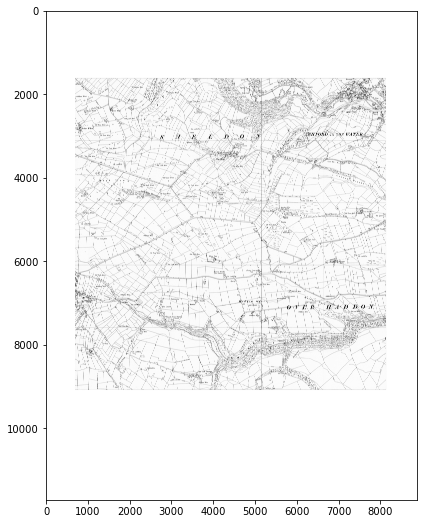

In [74]:
plt.figure(figsize=(9, 9))
plt.imshow(lyr, cmap='gray')

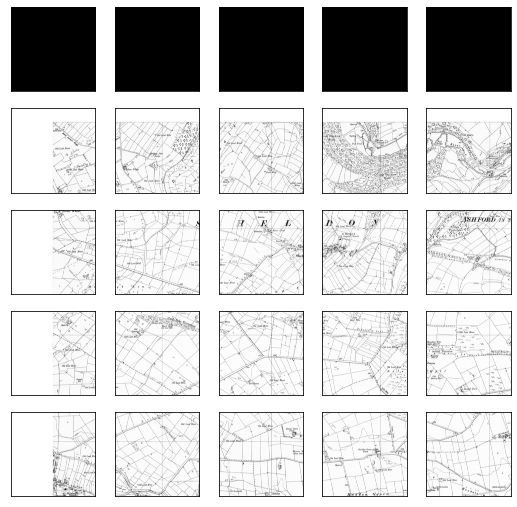

In [75]:
plt.figure(figsize=(9, 9))
square = 5
ix = 1
for i in range(square):
	for j in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot 
		plt.imshow(lcg[i, j, :, :], cmap='gray')
		ix += 1
# show the figure
plt.show()

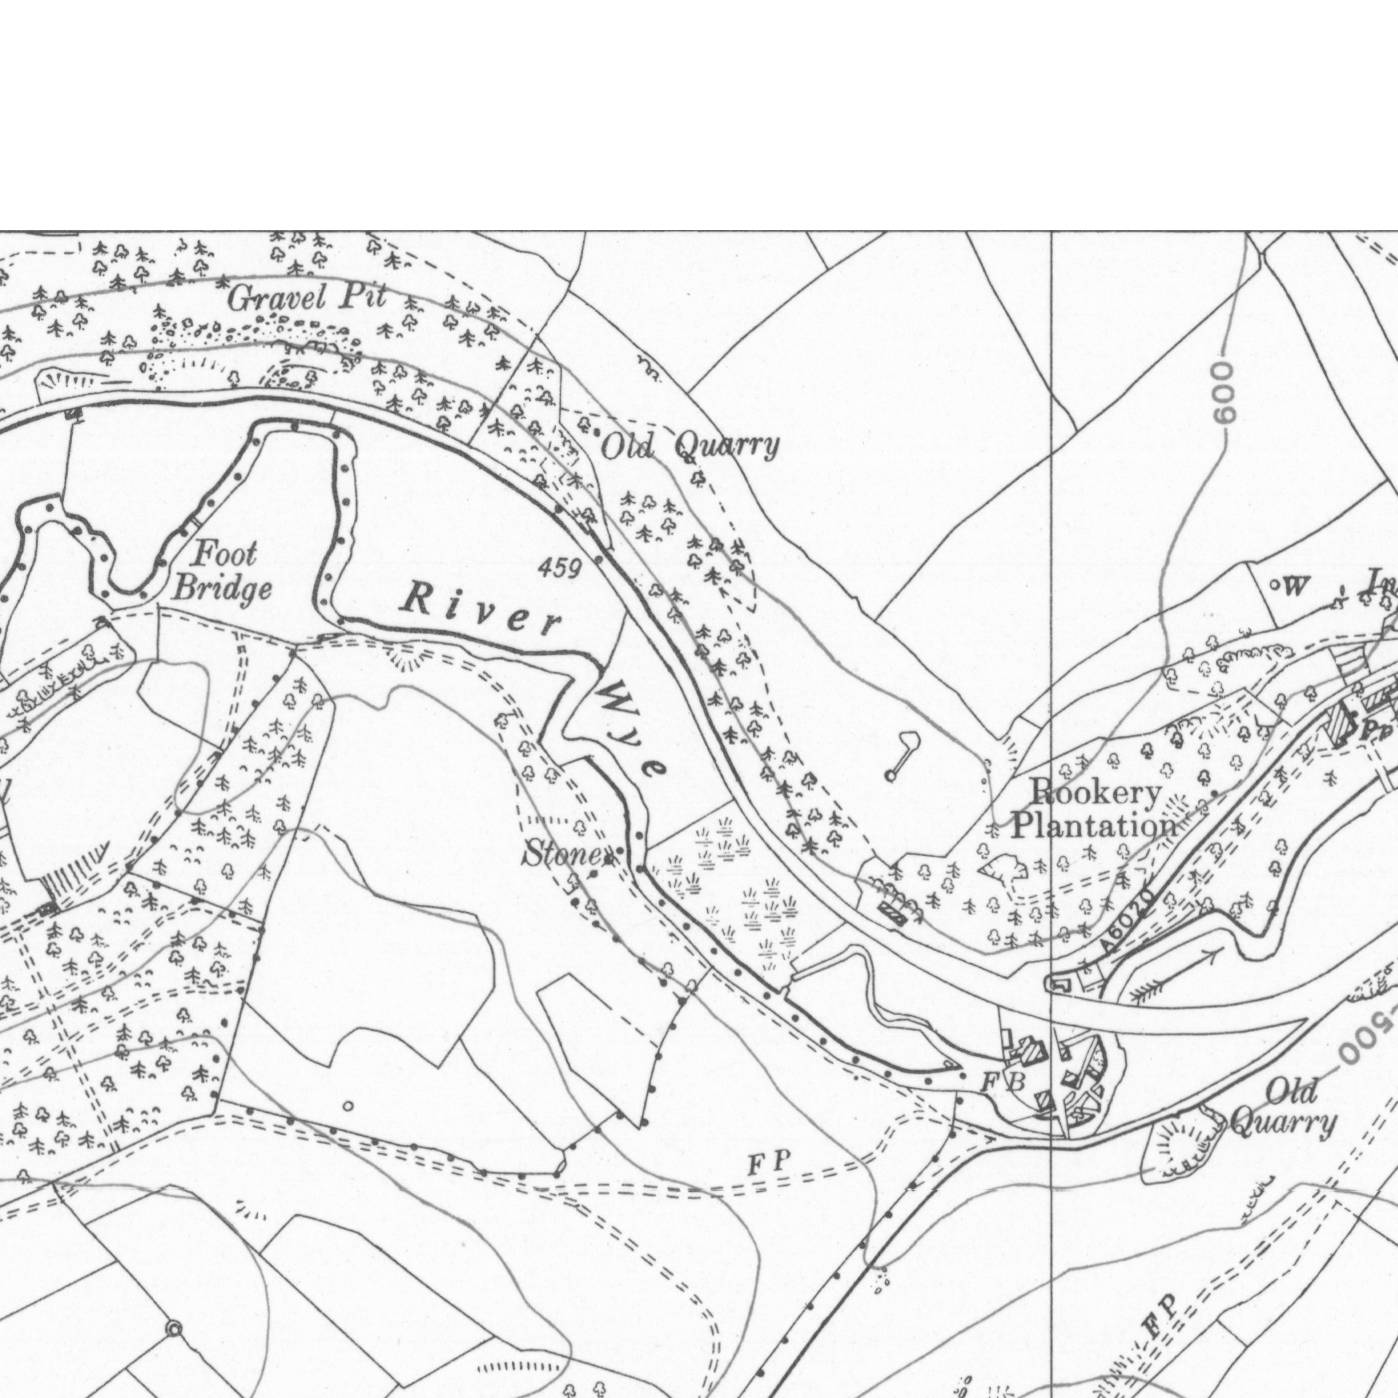

In [76]:

patch_img_arr = lcg[1,4,:,:] 
patch_img = Image.fromarray(patch_img_arr) 
display(patch_img)

### Using Thijs idea


In [ ]:
# Create bounding boxes for all sheets and tiles. 
# Create a table that says which sheets you need for one 1km2 tile. 
# Might be just 1, or more than 1. Load all those sheets in memory, if multiple stitch together. 
# Then cut out the 1km2 tile and save. Repeat for all tiles. 

In [77]:
# load the wp LCG grid sq only
grid = gpd.read_file(shp)

In [6]:
import glob, os
parent_dir = "../content/tifs/1k_tifs/"
for pdf_file in glob.glob(os.path.join(parent_dir, '*.tif')):
    print (pdf_file)

../content/tifs/1k_tifs\SK0468.TIF
../content/tifs/1k_tifs\SK0469.TIF
../content/tifs/1k_tifs\SK0567.TIF
../content/tifs/1k_tifs\SK0568.TIF
../content/tifs/1k_tifs\SK0569.TIF
../content/tifs/1k_tifs\SK0651.TIF
../content/tifs/1k_tifs\SK0652.TIF
../content/tifs/1k_tifs\SK0667.TIF
../content/tifs/1k_tifs\SK0668.TIF
../content/tifs/1k_tifs\SK0669.TIF
../content/tifs/1k_tifs\SK0750.TIF
../content/tifs/1k_tifs\SK0751.TIF
../content/tifs/1k_tifs\SK0752.TIF
../content/tifs/1k_tifs\SK0753.TIF
../content/tifs/1k_tifs\SK0754.TIF
../content/tifs/1k_tifs\SK0755.TIF
../content/tifs/1k_tifs\SK0756.TIF
../content/tifs/1k_tifs\SK0766.TIF
../content/tifs/1k_tifs\SK0767.TIF
../content/tifs/1k_tifs\SK0768.TIF
../content/tifs/1k_tifs\SK0769.TIF
../content/tifs/1k_tifs\SK0770.TIF
../content/tifs/1k_tifs\SK0771.TIF
../content/tifs/1k_tifs\SK0850.TIF
../content/tifs/1k_tifs\SK0851.TIF
../content/tifs/1k_tifs\SK0852.TIF
../content/tifs/1k_tifs\SK0853.TIF
../content/tifs/1k_tifs\SK0854.TIF
../content/tifs/1k_t